### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv('College data.csv')
data

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

### Drop Data

In [4]:
data = data.drop(['private', 'books', 'terminal'], axis = 1)
data

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,personal,phd,s_f_ratio,perc_alumni,expend,grad_rate
0,1660,1232,721,23,52,2885,537,7440,3300,2200,70,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,1500,29,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,1165,53,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,875,92,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,1500,76,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,1200,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,1250,73,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,781,67,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,2115,96,5.8,49,40386,99


### Clustering K-Means

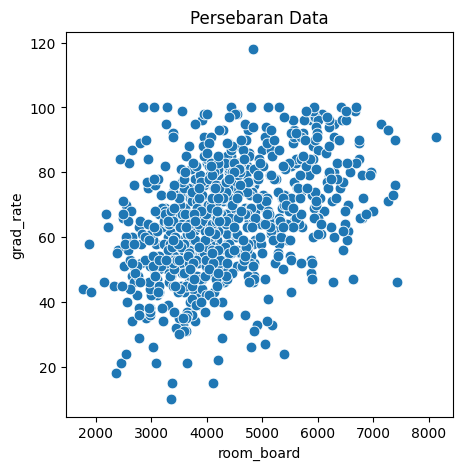

In [5]:
#persebaran data
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'room_board', y = 'grad_rate', data = data, s = 60)
plt.title('Persebaran Data')
plt.show()

### Elbow Method

In [6]:
#hitung within cluster sum of squared error (WCCSS) untuk tiap kluster yang berbeda

from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(data)
    wcss.append(kmModel.inertia_)

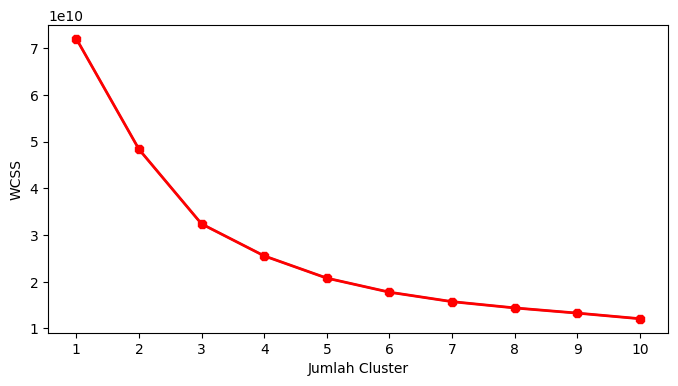

In [7]:
plt.figure(figsize = (8,4))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [8]:
#model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 4, n_init = 10)
kmModelFix.fit(data)

#memprediksi hasil
hasil_prediksi = kmModelFix.predict(data)
hasil_prediksi

array([1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 3,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 3, 1,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,

In [9]:
data['Label'] = hasil_prediksi
data.head()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,personal,phd,s_f_ratio,perc_alumni,expend,grad_rate,Label
0,1660,1232,721,23,52,2885,537,7440,3300,2200,70,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,1500,29,12.2,16,10527,56,2
2,1428,1097,336,22,50,1036,99,11250,3750,1165,53,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,875,92,7.7,37,19016,59,2
4,193,146,55,16,44,249,869,7560,4120,1500,76,11.9,2,10922,15,1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24572\4231172255.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(x = 'room_board', y = 'grad_rate', hue = 'Label',


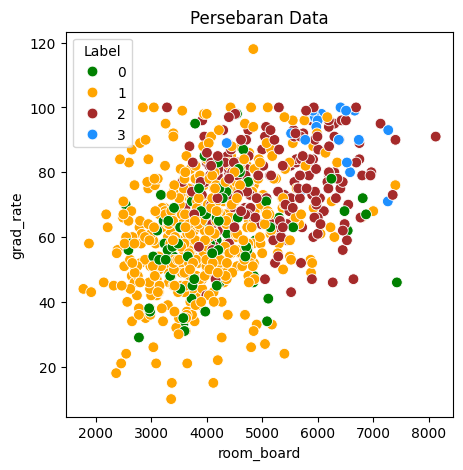

In [10]:
#persebaran data beserta labelnya

plt.figure(figsize = (5,5))
sns.scatterplot(x = 'room_board', y = 'grad_rate', hue = 'Label', 
palette = ['green', 'orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = data, 
s = 60)
plt.title('Persebaran Data')
plt.show()